<a href="https://colab.research.google.com/github/armandochernandez-ai/Curso-python-slava/blob/main/Unidad_3/Predictor_Salarios_NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este ejercicio se realiza un analisis de regresión lineal simple
como herramienta para pronosticar el salario de un jugador en la Liga de Nacional
de Futbol Americano de los Estados Unidos de Norteamerica.
.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,rating,salary,draft_round,age,experience,bmi
rating,1.000000,0.810253,0.008064,0.292463,0.416545,0.077374
salary,0.810253,1.000000,0.003895,0.442704,0.532051,0.037066
draft_round,0.008064,0.003895,1.000000,-0.081857,-0.055498,0.047773
age,0.292463,0.442704,-0.081857,1.000000,0.920067,0.086674
experience,0.416545,0.532051,-0.055498,0.920067,1.000000,0.071140
bmi,0.077374,0.037066,0.047773,0.086674,0.071140,1.000000


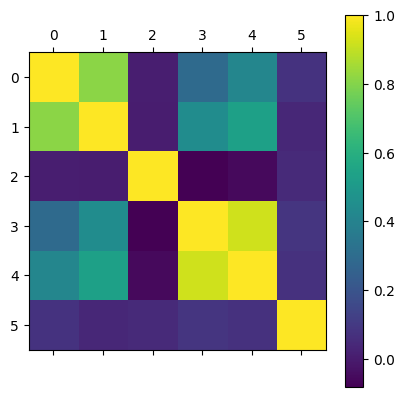

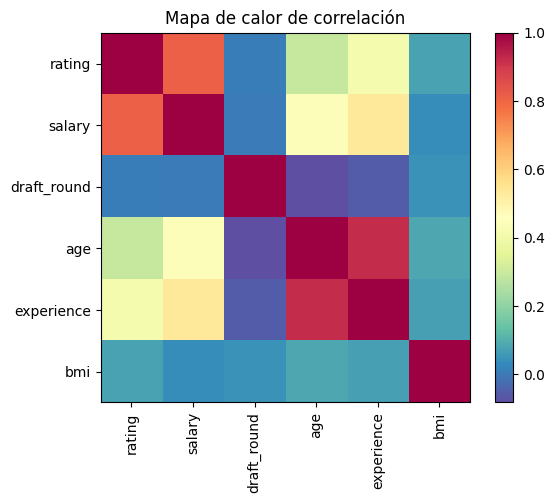

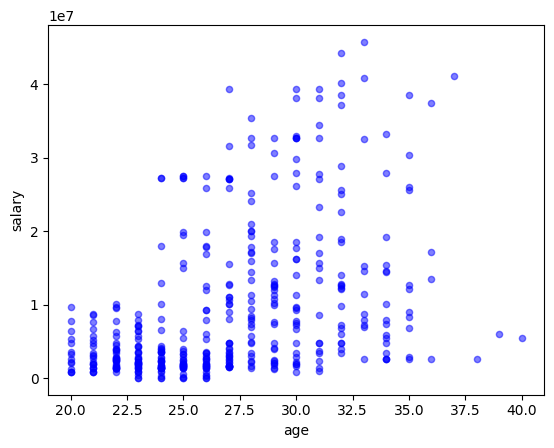

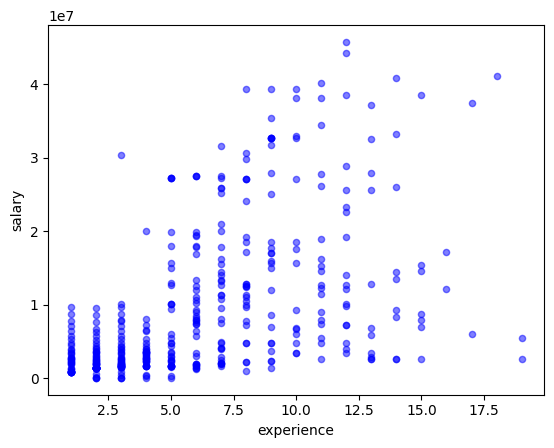

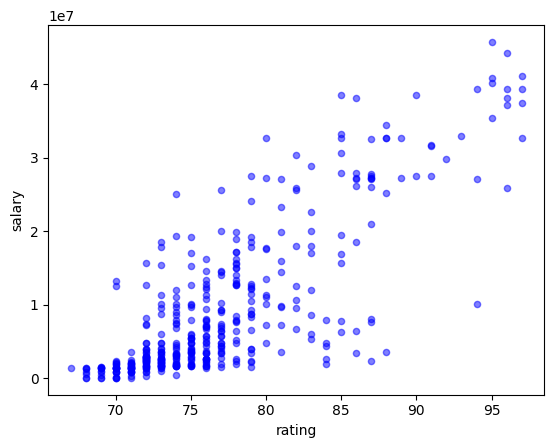

,rating
0,97
1,97
2,96
3,96
4,96
...,...
434,95
435,95
436,94
437,94


,salary
0,37440000
1,32740000
2,25840000
3,37200000
4,38200000
...,...
434,40920000
435,35360000
436,10170000
437,39340000


,rating
118,78
114,78
415,69
210,75
325,72
...,...
106,79
270,74
348,72
435,95


,rating
265,74
78,81
347,72
255,74
327,72
...,...
410,69
398,70
108,79
346,72


,salary
118,13440000
114,12780000
415,1430000
210,1620000
325,4770000
...,...
106,12500000
270,1650000
348,2830000
435,35360000


,salary
265,10120000
78,16000000
347,1290000
255,19430000
327,1620000
...,...
410,80000
398,12500000
108,8350000
346,3000000


LinearRegression()

Coeficiente: [1286949.47235544]
Intercepto: -89680833.20569152
R²: 0.7007683037985764


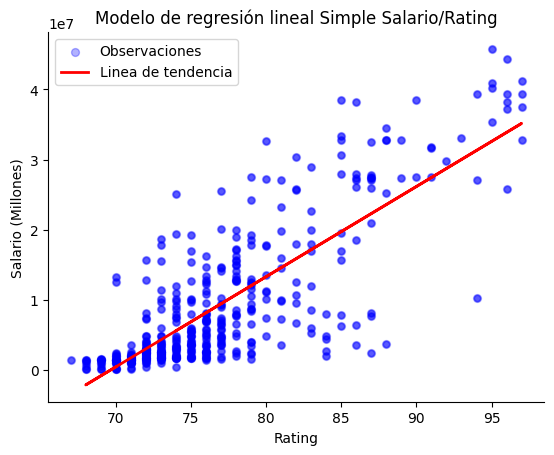

In [84]:
# Script completo para análisis de regresión simple con todas las métricas
instruccion = """En este ejercicio se realiza un analisis de regresión lineal simple
como herramienta para pronosticar el salario de un jugador en la Liga de Nacional
de Futbol Americano de los Estados Unidos de Norteamerica.
."""

print(instruccion)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from google.colab import drive

# Configuración de estilo para los gráficos
plt.style.use('default')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')

# Cargar los datos
datos_nfl = pd.read_csv('/content/drive/My Drive/Colab Data/data_af.csv')

# Correlación
display(datos_nfl.corr())
plt.matshow(datos_nfl.corr())#forma simple de presentar heatmap
plt.colorbar()
plt.show()

#Grafico del tipo heatmap para correlación
plt.imshow(datos_nfl.corr(), cmap="Spectral_r")
plt.yticks(range(len(datos_nfl.corr().columns)), datos_nfl.corr().columns)
plt.xticks(range(len(datos_nfl.corr().columns)), datos_nfl.corr().columns, rotation=90)
plt.title("Mapa de calor de correlación")
plt.colorbar()
plt.show()

#gráficos de menor a mayor correlación
datos_nfl.plot(kind='scatter', x='age', y='salary', s=20, alpha=.5, color="blue")
plt.show()

datos_nfl.plot(kind='scatter', x='experience', y='salary', s=20, alpha=.5, color="blue")
plt.show()

datos_nfl.plot(kind='scatter', x='rating', y='salary', s=20, alpha=.5, color="blue")
plt.show()

#Mejorar presentación
plt.scatter(x=datos_nfl['rating'], y=datos_nfl['salary'], s=20, alpha=.5,color="blue")
plt.ylabel('Salario');
plt.xlabel('Rating');
plt.title('Relación Salario/Rating')

plt.legend(frameon=False, loc=2)
plt.gca().spines[['top', 'right']].set_visible(False)

#Variable independidente y dependiente
X = datos_nfl[['rating']]
y = datos_nfl['salary']
display(X)
display(y)

#Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#test_size determina la cantidad de datos a dejar fuera, es decir 70% son tomados

display(X_train)
display(X_test)
display(y_train)
display(y_test)

modelo=LinearRegression()
modelo.fit(X_train, y_train)
display(modelo)

print(f"Coeficiente: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")

#Predicciones
y_pred = modelo.predict(X_test)
results_R2 = r2_score(y_test, y_pred)
print(f"R²: {results_R2}")
#y_pred_train = modelo.predict(X_train)

#Gráfico del modelo lineal
plt.scatter(X,y, color='blue', label='Observaciones', s=32, alpha=.3)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linea de tendencia')
plt.title('Modelo de regresión lineal Simple Salario/Rating')
plt.xlabel('Rating');
plt.ylabel('Salario (Millones)');
plt.legend()
plt.show()



### Modelo de regresión de segundo grado: Salario vs. Experiencia

--- Métricas para Salario vs. Experiencia (Grado 2) ---
Coeficientes: [      0.         2988017.90806761 -124322.61181254]
Intercepto: -3018057.1115159
R²: 0.2942589784263522
MSE: 97259894031657.05
RMSE: 9862043.096217794
MAPE: 4.198809521488929


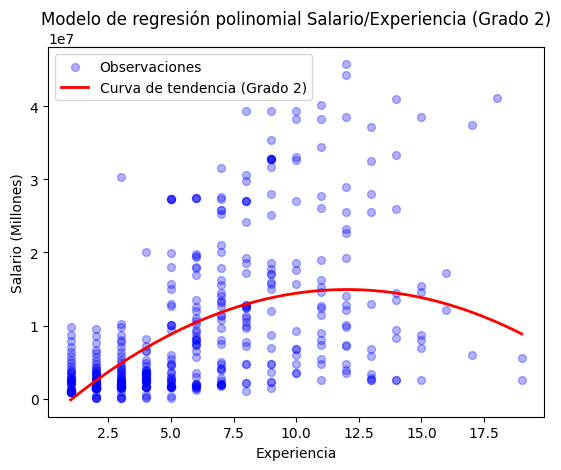

In [80]:
# Modelo de regresión de segundo grado para Salario vs. Experiencia
from sklearn.preprocessing import PolynomialFeatures

# Variable independiente y dependiente
X_exp = datos_nfl[['experience']]
y_exp = datos_nfl['salary']

# Transformar la variable independiente para regresión polinomial de grado 2
poly = PolynomialFeatures(degree=2)
X_exp_poly = poly.fit_transform(X_exp)

# Dividir en train y test
X_exp_train, X_exp_test, y_exp_train, y_exp_test = train_test_split(X_exp_poly, y_exp, test_size=0.3, random_state=42)

# Entrenar el modelo
modelo_exp_poly = LinearRegression()
modelo_exp_poly.fit(X_exp_train, y_exp_train)

# Predicciones
y_exp_pred = modelo_exp_poly.predict(X_exp_test)

# Evaluar el modelo
r2_exp_poly = r2_score(y_exp_test, y_exp_pred)
mse_exp_poly = mean_squared_error(y_exp_test, y_exp_pred)
rmse_exp_poly = np.sqrt(mse_exp_poly)
mape_exp_poly = mean_absolute_percentage_error(y_exp_test, y_exp_pred)

print(f"--- Métricas para Salario vs. Experiencia (Grado 2) ---")
print(f"Coeficientes: {modelo_exp_poly.coef_}")
print(f"Intercepto: {modelo_exp_poly.intercept_}")
print(f"R²: {r2_exp_poly}")
print(f"MSE: {mse_exp_poly}")
print(f"RMSE: {rmse_exp_poly}")
print(f"MAPE: {mape_exp_poly}")


# Gráfico del modelo polinomial
plt.scatter(X_exp, y_exp, color='blue', label='Observaciones', s=32, alpha=.3)
# Para graficar la curva, creamos una secuencia de valores de experience y predecimos el salario
X_exp_seq = np.linspace(X_exp['experience'].min(), X_exp['experience'].max(), 100).reshape(-1, 1)
X_exp_seq_poly = poly.transform(X_exp_seq)
y_exp_seq_pred = modelo_exp_poly.predict(X_exp_seq_poly)
plt.plot(X_exp_seq, y_exp_seq_pred, color='red', linewidth=2, label='Curva de tendencia (Grado 2)')
plt.title('Modelo de regresión polinomial Salario/Experiencia (Grado 2)')
plt.xlabel('Experiencia');
plt.ylabel('Salario (Millones)');
plt.legend()
plt.show()

### Modelo de regresión de segundo grado: Salario vs. Rating

--- Métricas para Salario vs. Rating (Grado 2) ---
Coeficientes: [      0.         -639209.78597962   11989.82565387]
Intercepto: -12903540.321065165
R²: 0.7166113000959549
MSE: 39054488941252.805
RMSE: 6249359.082438199
MAPE: 1.4563011478153798


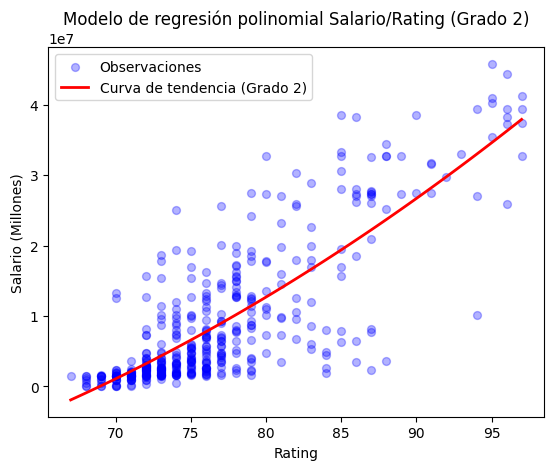

In [81]:
# Modelo de regresión de segundo grado para Salario vs. Rating

# Variable independiente y dependiente
X_rating = datos_nfl[['rating']]
y_rating = datos_nfl['salary']

# Transformar la variable independiente para regresión polinomial de grado 2
poly = PolynomialFeatures(degree=2)
X_rating_poly = poly.fit_transform(X_rating)

# Dividir en train y test
X_rating_train, X_rating_test, y_rating_train, y_rating_test = train_test_split(X_rating_poly, y_rating, test_size=0.3, random_state=42)

# Entrenar el modelo
modelo_rating_poly = LinearRegression()
modelo_rating_poly.fit(X_rating_train, y_rating_train)

# Predicciones
y_rating_pred = modelo_rating_poly.predict(X_rating_test)

# Evaluar el modelo
r2_rating_poly = r2_score(y_rating_test, y_rating_pred)
mse_rating_poly = mean_squared_error(y_rating_test, y_rating_pred)
rmse_rating_poly = np.sqrt(mse_rating_poly)
mape_rating_poly = mean_absolute_percentage_error(y_rating_test, y_rating_pred)

print(f"--- Métricas para Salario vs. Rating (Grado 2) ---")
print(f"Coeficientes: {modelo_rating_poly.coef_}")
print(f"Intercepto: {modelo_rating_poly.intercept_}")
print(f"R²: {r2_rating_poly}")
print(f"MSE: {mse_rating_poly}")
print(f"RMSE: {rmse_rating_poly}")
print(f"MAPE: {mape_rating_poly}")

# Gráfico del modelo polinomial
plt.scatter(X_rating, y_rating, color='blue', label='Observaciones', s=32, alpha=.3)
# Para graficar la curva, creamos una secuencia de valores de rating y predecimos el salario
X_rating_seq = np.linspace(X_rating['rating'].min(), X_rating['rating'].max(), 100).reshape(-1, 1)
X_rating_seq_poly = poly.transform(X_rating_seq)
y_rating_seq_pred = modelo_rating_poly.predict(X_rating_seq_poly)
plt.plot(X_rating_seq, y_rating_seq_pred, color='red', linewidth=2, label='Curva de tendencia (Grado 2)')
plt.title('Modelo de regresión polinomial Salario/Rating (Grado 2)')
plt.xlabel('Rating');
plt.ylabel('Salario (Millones)');
plt.legend()
plt.show()